<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/spam_dataset_Gaussian_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/spam.csv"

# Read the CSV file
df = pd.read_csv(file_path, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.head())


   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [6]:
df.shape

(5572, 2)

In [8]:
#Identify number of messages in each category
df['label'].value_counts()

,count
label,
0,4825
1,747


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
#Train the probabilistic model

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [15]:
#Predict unseen messages
y_pred = model.predict(X_test)


In [16]:
#Test with custom user-entered messages
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return "Suspicious" if pred == 1 else "Not Suspicious"

print(predict_message("You won a free lottery prize"))
print(predict_message("Are we meeting tomorrow?"))


Suspicious
Not Suspicious


In [18]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)



Accuracy: 0.968609865470852


In [19]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[965   0]
 [ 35 115]]


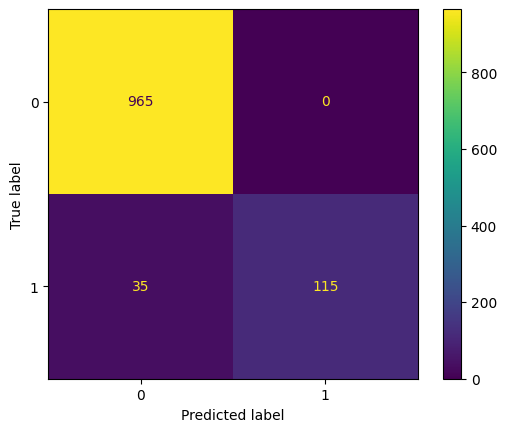

In [21]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=model.classes_)
disp.plot()
plt.show()

Multinomial naive Bayes


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB



# Convert text data into word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

# Convert counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()  # it will calculate frequency of words
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42
)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)


In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_mnb)
print("Accuracy:",accuracy)



Accuracy: 0.968609865470852


In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_mnb)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[965   0]
 [ 35 115]]


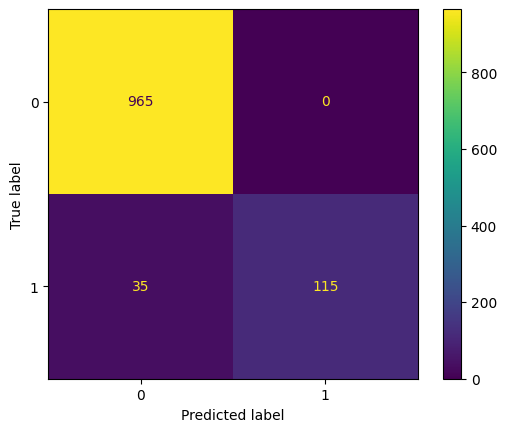

In [ ]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=mnb.classes_)
disp.plot()
plt.show()

Bernouli Naive Bayex (For Binary Features)

In [ ]:
# Convert text into binary presence/absence of important words
important_words = ['free', 'win', 'offer', 'money', 'urgent']

for word in important_words:
    df[word] = df['text'].apply(lambda x: 1 if word in x.lower() else 0)


In [ ]:
X = df[important_words]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_bnb)
print("Accuracy:",accuracy)



Accuracy: 0.895067264573991


In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_bnb)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[929  36]
 [ 81  69]]


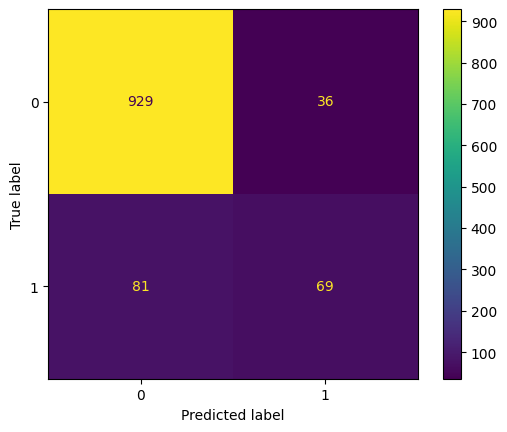

In [ ]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=bnb.classes_)
disp.plot()
plt.show()